In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install pandas matplotlib seaborn wordcloud


In [3]:
#upload dataset
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\project 7\twitter_disaster.csv')

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df["location"].value_counts()

location
USA                            104
New York                        71
United States                   50
London                          45
Canada                          29
                              ... 
Click the link below, okay       1
Milwaukee County                 1
Gwersyllt, Wales                 1
Primum non nocere                1
Alabama, USA                     1
Name: count, Length: 3341, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
df['location'].fillna("Unknown", inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7032\3495015711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna("Unknown", inplace=True)


In [9]:
df['keyword'].fillna(df['keyword'].mode()[0], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7032\351905770.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['keyword'].fillna(df['keyword'].mode()[0], inplace=True)


In [10]:
df.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [11]:
df["location"].value_counts()

location
Unknown                      2535
USA                           104
New York                       71
United States                  50
London                         45
                             ... 
Punjab                          1
No ID, No VOTE!!!               1
Maharashtra                     1
GREENSBORO,NORTH CAROLINA       1
milky way                       1
Name: count, Length: 3341, dtype: int64

### Extract relevant features from the text data, such as word frequencies, TF-IDF scores, and sentiment analysis.

In [ ]:
# Visulaization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Word Count	Total number of words
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['word_count']

0       13
1        7
2       22
3        8
4       16
        ..
7608    11
7609    20
7610     8
7611    19
7612    13
Name: word_count, Length: 7613, dtype: int64

In [ ]:
# Character Count	Total number of characters
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

In [ ]:
df["Avg_word_len"] = df['char_count'] / df['word_count']

In [ ]:
# Number of Hashtags	Count of words starting with #
df['hashtags'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
sum(df['hashtags'])

3340

In [ ]:
# Number of Mentions	Count of @ mentions
df['mentions'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
sum(df['mentions'])

2664

In [ ]:
# Number of URLs	Count of links (e.g., http)
df['urls'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('http')]))
sum(df['urls'])

4703

In [ ]:
# Uppercase Word Count	Emphasized or shouting words
df['upper'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
sum(df['upper'])

7110

In [ ]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import nltk
from nltk.corpus import stopwords

# Download the 'stopwords' dataset if it hasn't been downloaded already
nltk.download('stopwords')

stop = stopwords.words('english')
df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
sum(df['stopwords'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


28634

In [ ]:
# Punctuation Count	Useful in emotion or spam detection
import string
df['punctuation'] = df['text'].apply(lambda x: len([x for x in x.split() if x in string.punctuation]))
sum(df['punctuation'])

1221

In [ ]:
!pip install emoji


In [ ]:
# Emoji/Emoticon Count	Indication of sentiment
import emoji
df["emoji_count"] = df["text"].apply(lambda x: len([c for c in x if c in emoji.EMOJI_DATA])) # Replace UNICODE_EMOJI with EMOJI_DATA
sum(df["emoji_count"])

10

In [ ]:
# Special Characters	E.g., #, @, !, ...
df['special_chars'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#') or x.startswith('@') or x.startswith('!')]))
sum(df['special_chars'])

6034

In [ ]:
df.tail()

,id,keyword,location,text,target,word_count,char_count,Avg_word_len,hashtags,mentions,urls,upper,stopwords,punctuation,emoji_count,special_chars
7608,10869,fatalities,Unknown,Two giant cranes holding a bridge collapse int...,1,11,83,7.545455,0,0,1,0,2,0,0,0
7609,10870,fatalities,Unknown,@aria_ahrary @TheTawniest The out of control w...,1,20,125,6.250000,0,2,0,0,7,0,0,2
7610,10871,fatalities,Unknown,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8,65,8.125000,0,0,1,2,1,0,0,0
7611,10872,fatalities,Unknown,Police investigating after an e-bike collided ...,1,19,137,7.210526,0,0,0,0,5,0,0,0
7612,10873,fatalities,Unknown,The Latest: More Homes Razed by Northern Calif...,1,13,94,7.230769,0,0,1,1,1,1,0,0


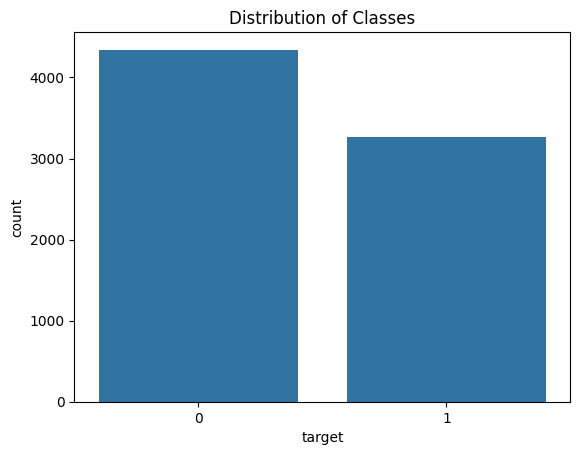

In [ ]:
#Visualize the distribution of classes (disaster vs. non-disaster tweets) using histograms or bar plots
sns.countplot(x='target', data=df)
plt.title('Distribution of Classes')
plt.show()

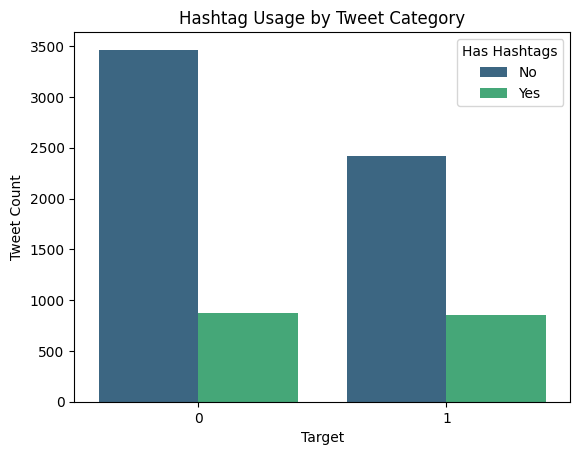

In [ ]:
df['has_hashtags'] = df['hashtags'].apply(lambda x: 'Yes' if x > 0 else 'No')

sns.countplot(data=df, x='target', hue='has_hashtags', palette='viridis')
plt.title('Hashtag Usage by Tweet Category')
plt.xlabel('Target')
plt.ylabel('Tweet Count')
plt.legend(title='Has Hashtags')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\3450069716.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='word_count', palette='Set3')


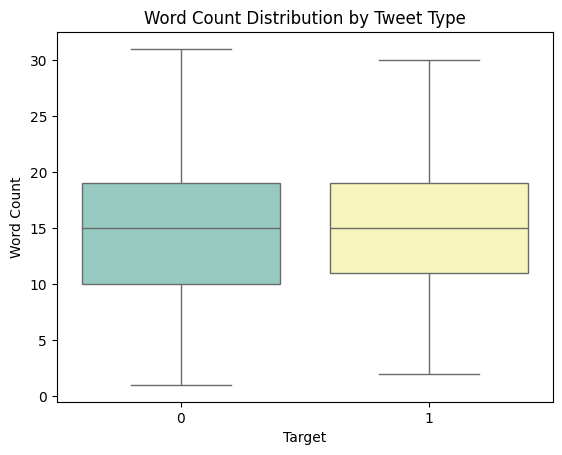

In [ ]:
sns.boxplot(data=df, x='target', y='word_count', palette='Set3')
plt.title('Word Count Distribution by Tweet Type')
plt.xlabel('Target')
plt.ylabel('Word Count')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\3430739224.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='target', y='Avg_word_len', palette='magma')


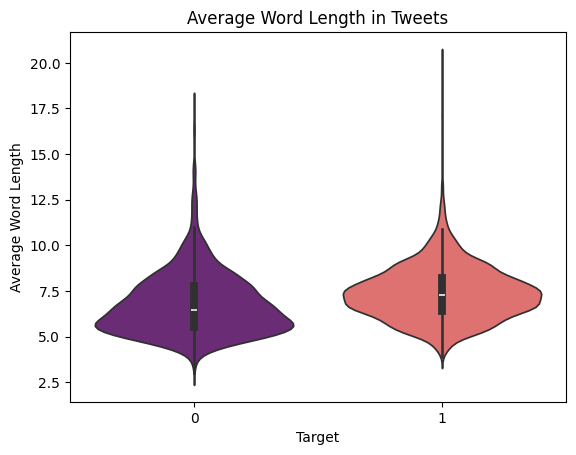

In [ ]:
# Average Word Length by Target

sns.violinplot(data=df, x='target', y='Avg_word_len', palette='magma')
plt.title('Average Word Length in Tweets')
plt.xlabel('Target')
plt.ylabel('Average Word Length')
plt.show()

Consider using pre-trained word embeddings like Word2Vec or GloVe to capture semantic meanings.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\100716889.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='upper', palette='Set1')


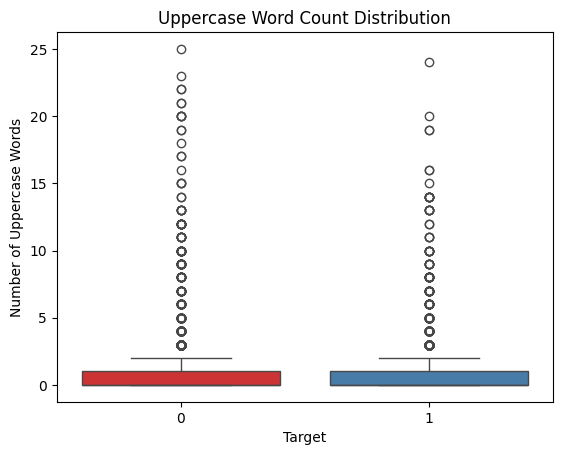

In [ ]:
# Uppercase Word Count by Category

sns.boxplot(data=df, x='target', y='upper', palette='Set1')
plt.title('Uppercase Word Count Distribution')
plt.xlabel('Target')
plt.ylabel('Number of Uppercase Words')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\1271170067.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Target')


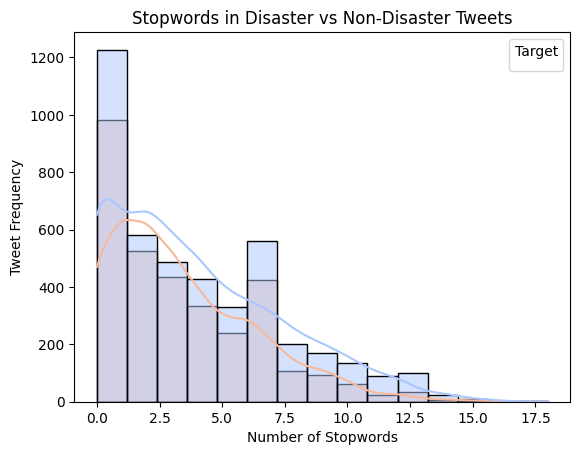

In [ ]:
# Stopword Count Comparison

sns.histplot(data=df, x='stopwords', hue='target', bins=15, kde=True, palette='coolwarm')
plt.title('Stopwords in Disaster vs Non-Disaster Tweets')
plt.xlabel('Number of Stopwords')
plt.ylabel('Tweet Frequency')
plt.legend(title='Target')
plt.show()

Key Insights:
Most tweets (both types) have few stopwords (0–3):

The highest tweet frequency is at 0 stopwords.

Many tweets are short and likely contain key alert/action words (e.g., "Fire alert!", "Earthquake hit").

Disaster tweets (blue) tend to have slightly more stopwords than non-disaster tweets (orange):

You can see the blue line extends further right than the orange.

This suggests disaster tweets might be longer or more descriptive (“Please evacuate immediately” vs “BBQ party tonight”).

KDE (Kernel Density Estimate) lines:

These smooth lines help visualize the distribution trend.

Blue KDE (disaster) peaks slightly after the orange KDE, confirming that disaster tweets tend to have more stopwords on average.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\1420551746.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='special_chars', palette='pastel')


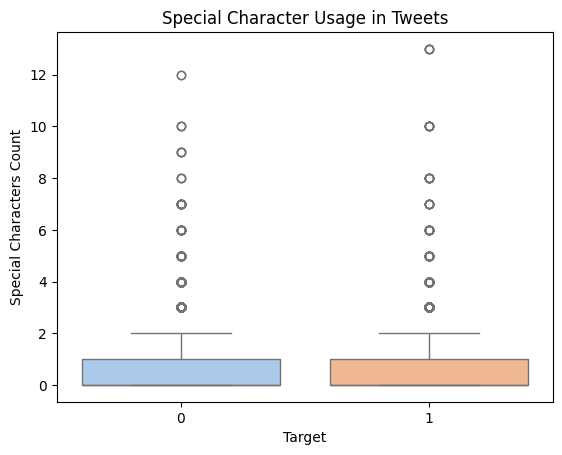

In [ ]:
# Special Character Count


sns.boxplot(data=df, x='target', y='special_chars', palette='pastel')
plt.title('Special Character Usage in Tweets')
plt.xlabel('Target')
plt.ylabel('Special Characters Count')
plt.show()

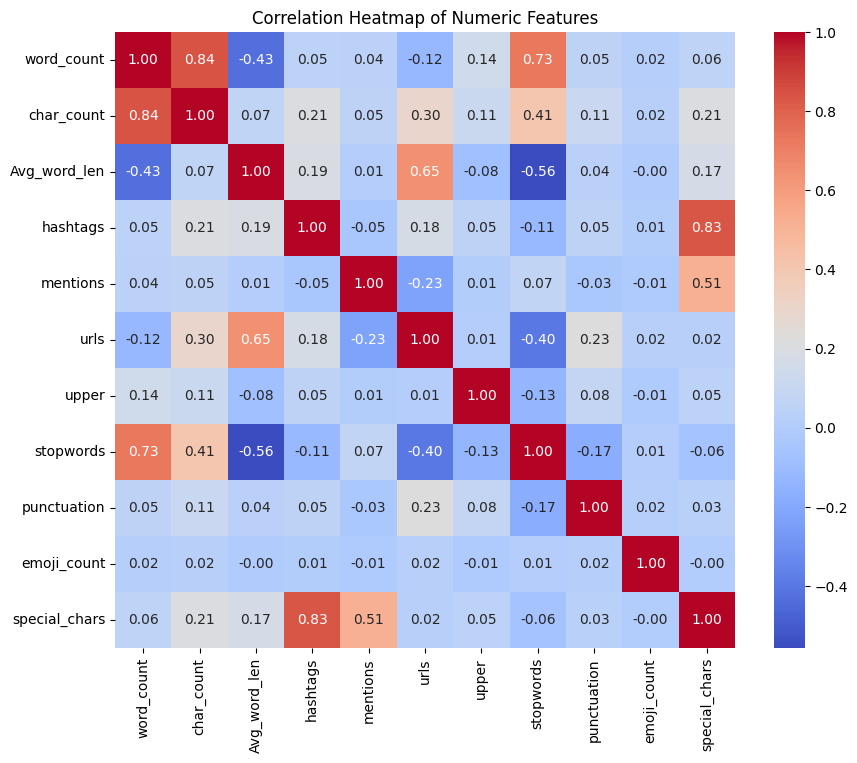

In [ ]:
# correlation Heatmap of Numeric Features
numeric_features = ['word_count', 'char_count', 'Avg_word_len', 'hashtags', 'mentions', 'urls', 'upper', 'stopwords', 'punctuation', 'emoji_count', 'special_chars']
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [ ]:
#Clean the text data by removing special characters, URLs, and punctuation marks.

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# lower
# tokenization
# stop words removal
# lemmatization
# special characters
# date and time normalization
#stemming

In [ ]:
# stop words removal
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['text']

0       Our Deeds Reason #earthquake May ALLAH Forgive us
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked 'shelter place' notified o...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent photo Ruby #Alaska smoke #wildfi...
                              ...                        
7608    Two giant cranes holding bridge collapse nearb...
7609    @aria_ahrary @TheTawniest The control wild fir...
7610    M1.94 [01:04 UTC]?5km S Volcano Hawaii. http:/...
7611    Police investigating e-bike collided car Littl...
7612    The Latest: More Homes Razed Northern Californ...
Name: text, Length: 7613, dtype: object

In [ ]:
# Sample text input (using your earlier data as an example)
text_data = df['text']
print("Original Text:\n", text_data)

Original Text:
 0       Our Deeds Reason #earthquake May ALLAH Forgive us
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked 'shelter place' notified o...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent photo Ruby #Alaska smoke #wildfi...
                              ...                        
7608    Two giant cranes holding bridge collapse nearb...
7609    @aria_ahrary @TheTawniest The control wild fir...
7610    M1.94 [01:04 UTC]?5km S Volcano Hawaii. http:/...
7611    Police investigating e-bike collided car Littl...
7612    The Latest: More Homes Razed Northern Californ...
Name: text, Length: 7613, dtype: object


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
# Function to clean text (remove special characters and numbers)
def clean_text(text_data):
    # Remove numbers
    text = re.sub(r'\d+', '', text_data)
    # Remove special characters (keep only letters, spaces, and basic punctuation)
    text = re.sub(r'[^a-zA-Z\s]', '', text_data)
    # Convert to lowercase and remove extra whitespace
    text = text.lower().strip()
    return text


In [ ]:
cleaned_text = text_data.apply(clean_text)
print("Cleaned Text:\n", cleaned_text)

Cleaned Text:
 0        our deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       all residents asked shelter place notified off...
3       people receive wildfires evacuation orders cal...
4       just got sent photo ruby alaska smoke wildfire...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest the control wild fires ...
7610           m  utckm s volcano hawaii httptcozdtoydebj
7611    police investigating ebike collided car little...
7612    the latest more homes razed northern californi...
Name: text, Length: 7613, dtype: object


In [ ]:
# cleaned_text_list = [cleaned_text]
# # or
# Clean_text = cleaned_text

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
tokens = cleaned_text.apply(word_tokenize).sum()
print("\nTokens:\n", tokens)


Tokens:
 ['our', 'deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us', 'forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada', 'all', 'residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'no', 'evacuation', 'shelter', 'place', 'orders', 'expected', 'people', 'receive', 'wildfires', 'evacuation', 'orders', 'california', 'just', 'got', 'sent', 'photo', 'ruby', 'alaska', 'smoke', 'wildfires', 'pours', 'school', 'rockyfire', 'update', 'california', 'hwy', 'closed', 'directions', 'due', 'lake', 'county', 'fire', 'cafire', 'wildfires', 'flood', 'disaster', 'heavy', 'rain', 'causes', 'flash', 'flooding', 'streets', 'manitou', 'colorado', 'springs', 'areas', 'im', 'top', 'hill', 'i', 'see', 'fire', 'woods', 'theres', 'emergency', 'evacuation', 'happening', 'building', 'across', 'street', 'im', 'afraid', 'tornado', 'coming', 'area', 'three', 'people', 'died', 'heat', 'wave', 'far', 'haha', 'south', 'tampa', 'getting', 'flooded', 'hah', 'wait', 'a', 'second', 'i', 'l

In [ ]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]
print("\nTokens after removing stopwords:\n", filtered_tokens)


Tokens after removing stopwords:
 ['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us', 'forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada', 'residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'evacuation', 'shelter', 'place', 'orders', 'expected', 'people', 'receive', 'wildfires', 'evacuation', 'orders', 'california', 'got', 'sent', 'photo', 'ruby', 'alaska', 'smoke', 'wildfires', 'pours', 'school', 'rockyfire', 'update', 'california', 'hwy', 'closed', 'directions', 'due', 'lake', 'county', 'fire', 'cafire', 'wildfires', 'flood', 'disaster', 'heavy', 'rain', 'causes', 'flash', 'flooding', 'streets', 'manitou', 'colorado', 'springs', 'areas', 'im', 'top', 'hill', 'see', 'fire', 'woods', 'theres', 'emergency', 'evacuation', 'happening', 'building', 'across', 'street', 'im', 'afraid', 'tornado', 'coming', 'area', 'three', 'people', 'died', 'heat', 'wave', 'far', 'haha', 'south', 'tampa', 'getting', 'flooded', 'hah', 'wait', 'second', 'live', 'south', 'ta

In [ ]:
# Word frequency analysis
from collections import Counter
word_freq = Counter(filtered_tokens)
print("\nWord Frequency:\n", word_freq.most_common(20))


Word Frequency:
 [('like', 345), ('im', 302), ('amp', 300), ('fire', 252), ('get', 229), ('new', 226), ('via', 220), ('news', 198), ('people', 196), ('one', 193), ('us', 170), ('video', 165), ('emergency', 157), ('disaster', 153), ('police', 141), ('would', 131), ('still', 129), ('time', 127), ('body', 125), ('got', 123)]


In [ ]:
!pip install spacy


In [ ]:
# Using spaCy for more advanced NLP (e.g., named entity recognition)
import spacy
nlp = spacy.load("en_core_web_sm")  # Load English model (install it first: python -m spacy download en_core_web_sm)
docs = cleaned_text.apply(nlp)

In [ ]:
for ent in docs.iloc[0].ents:
    print(ent.text, ent.label_)

In [ ]:
# Optional: Lemmatization with spaCy
lemmatized = [[token.lemma_ for token in doc] for doc in docs]

print("\nLemmatized Tokens (first 20):\n", lemmatized[0][:20]) #[0] presnt first sentence and 20 word limit


Lemmatized Tokens (first 20):
 ['our', 'deed', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'we']


In [ ]:
df['clean_text'] = cleaned_text

In [ ]:
df.head()

,id,keyword,location,text,target,word_count,char_count,Avg_word_len,hashtags,mentions,urls,upper,stopwords,punctuation,emoji_count,special_chars,has_hashtags,clean_text
0,1,fatalities,Unknown,Our Deeds Reason #earthquake May ALLAH Forgive us,1,13,69,5.307692,1,0,0,1,5,0,0,1,Yes,our deeds reason earthquake may allah forgive us
1,4,fatalities,Unknown,Forest fire near La Ronge Sask. Canada,1,7,38,5.428571,0,0,0,0,0,0,0,0,No,forest fire near la ronge sask canada
2,5,fatalities,Unknown,All residents asked 'shelter place' notified o...,1,22,133,6.045455,0,0,0,0,9,0,0,0,No,all residents asked shelter place notified off...
3,6,fatalities,Unknown,"13,000 people receive #wildfires evacuation or...",1,8,65,8.125000,1,0,0,0,1,0,0,1,Yes,people receive wildfires evacuation orders cal...
4,7,fatalities,Unknown,Just got sent photo Ruby #Alaska smoke #wildfi...,1,16,88,5.500000,2,0,0,0,6,0,0,2,Yes,just got sent photo ruby alaska smoke wildfire...


In [ ]:
# from wordcloud import WordCloud

# # Separate texts
# disaster_text = ' '.join(df[df['target'] == 1]['clean_text'].dropna())
# nondisaster_text = ' '.join(df[df['target'] == 0]['clean_text'].dropna())

# # Create side-by-side word clouds
# fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# # Disaster Word Cloud
# axs[0].imshow(WordCloud(width=800, height=400, background_color='black').generate(disaster_text))
# axs[0].set_title('Disaster Tweets Word Cloud', fontsize=18)
# axs[0].axis('off')

# # Non-Disaster Word Cloud
# axs[1].imshow(WordCloud(width=800, height=400, background_color='white').generate(nondisaster_text))
# axs[1].set_title('Non-Disaster Tweets Word Cloud', fontsize=18)
# axs[1].axis('off')

# plt.tight_layout()
# plt.show()


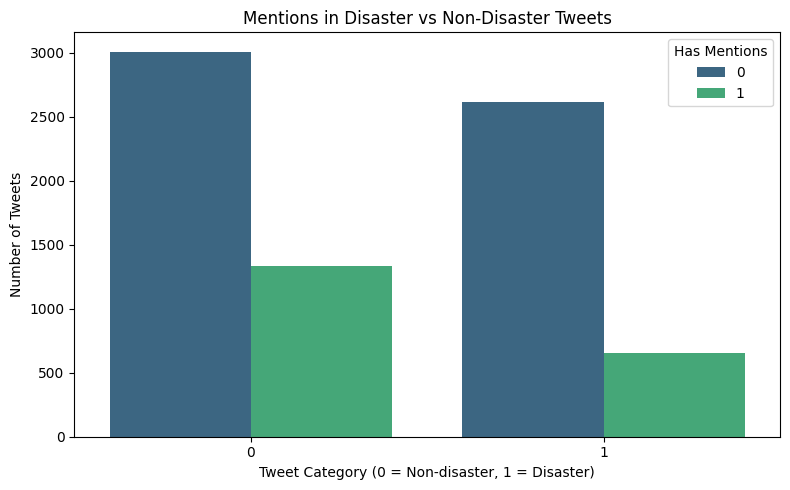

In [ ]:
# Create a new column 'has_mention' based on the 'mentions' column
df['has_mention'] = df['mentions'].apply(lambda x: 1 if x > 0 else 0)

# Now you can plot using 'has_mention' as the hue
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='target', hue='has_mention', palette='viridis')
plt.title('Mentions in Disaster vs Non-Disaster Tweets')
plt.xlabel('Tweet Category (0 = Non-disaster, 1 = Disaster)')
plt.ylabel('Number of Tweets')
plt.legend(title='Has Mentions')
plt.tight_layout()
plt.show()

In [ ]:
!pip install imbalanced-learn


In [ ]:
#use smote for inbalacing
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()

In [ ]:
from tkinter.constants import X
X = df[['clean_text', 'location', 'keyword']]
y = df['target']

In [ ]:
X.count()

clean_text    7613
location      7613
keyword       7613
dtype: int64

In [ ]:
y.count()

np.int64(7613)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [ ]:
#corpus = df['clean_text'].astype(str).tolist()
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#X = cv.fit_transform(corpus)


In [ ]:
# create vectoriser pikal file
import pickle
pickle.dump(cv, open('vectorizer.pkl', 'wb'))

In [ ]:
X_train_vec = cv.fit_transform(X_train)
X_test_vec = cv.transform(X_test)

In [ ]:
X_train_vec, X_test_vec

(<Compressed Sparse Row sparse matrix of dtype 'int64'
 	with 3 stored elements and shape (3, 3)>,
 <Compressed Sparse Row sparse matrix of dtype 'int64'
 	with 3 stored elements and shape (3, 3)>)

In [ ]:
#resampling
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)


ValueError: Found input variables with inconsistent numbers of samples: [3, 6090]

In [ ]:
X_train_resampled

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 72943 stored elements and shape (6984, 18440)>

In [ ]:
y_train_resampled

,target
0,0
1,0
2,0
3,0
4,0
...,...
6979,1
6980,1
6981,1
6982,1


In [ ]:
y_train_resampled

,target
0,0
1,0
2,0
3,0
4,0
...,...
6979,1
6980,1
6981,1
6982,1


In [ ]:
#import the nacessorry model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#using logistic regrassion
from sklearn.linear_model import LogisticRegression


In [ ]:
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
#prediction of logisticregrassion
y_pred = lr.predict(X_test_vec)
y_pred


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7800393959290873


In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
#prediction
y_pred = nb_classifier.predict(X_test_vec)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
#accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8187787261982928


In [ ]:
import pickle
pickle.dump(nb_classifier, open('nb_classifier.pkl', 'wb'))

In [ ]:
#classification metrix
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       850
           1       0.83      0.74      0.78       673

    accuracy                           0.82      1523
   macro avg       0.82      0.81      0.81      1523
weighted avg       0.82      0.82      0.82      1523



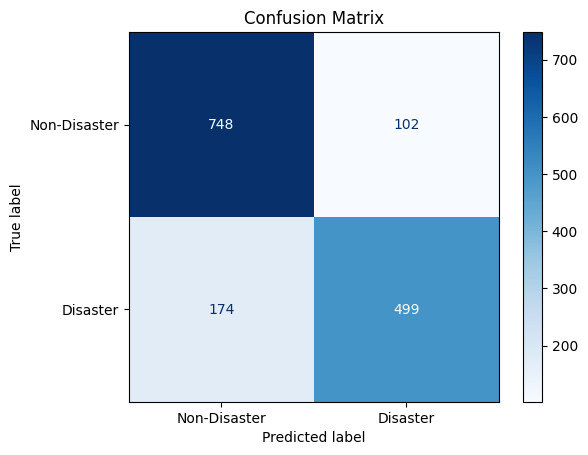

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Disaster", "Disaster"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

✅ 610 Non-disaster tweets were correctly classified as non-disaster.

✅ 532 Disaster tweets were correctly classified as disaster.

❌ 240 Non-disaster tweets were incorrectly predicted as disaster (False Positives).

❌ 141 Disaster tweets were wrongly classified as non-disaster (False Negatives).


TN = 610
FP = 240
FN = 141
TP = 532

In [ ]:
TN = 610
FP = 240
FN = 141
TP = 532

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")


Accuracy:  0.75
Precision: 0.69
Recall:    0.79
F1 Score:  0.74


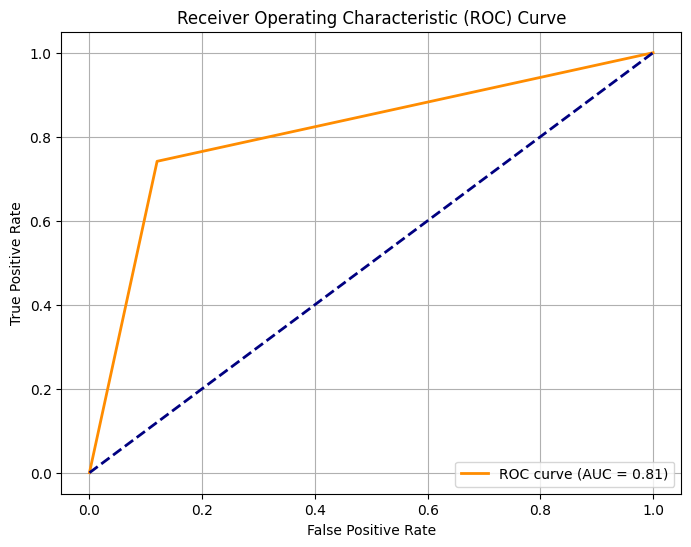

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()





In [ ]:
#using randomforest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [ ]:
#prediction
y_pred = rf.predict(X_test_vec)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
#accuraccy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.747866053841103


In [ ]:
#define neural network model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam



In [ ]:
#apply smote to balance class and traing data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

In [ ]:
# Define Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_vec.shape[1],)),  # Use X_train_vec.shape[1] here
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow as tf

# Convert the csr_matrix to a dense array
X_train_resampled_dense = X_train_resampled.toarray()

# Fit the model using the dense array
model.fit(X_train_resampled_dense, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.6457 - loss: 0.6265 - val_accuracy: 0.5175 - val_loss: 0.6292
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8979 - loss: 0.2651 - val_accuracy: 0.5211 - val_loss: 0.7464
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.9651 - loss: 0.1048 - val_accuracy: 0.5082 - val_loss: 0.9394
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9827 - loss: 0.0529 - val_accuracy: 0.4939 - val_loss: 1.1839
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.9869 - loss: 0.0370 - val_accuracy: 0.4896 - val_loss: 1.3623
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9895 - loss: 0.0318 - val_accuracy: 0.4968 - val_loss: 1.3299
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9935 - loss: 0.0176 - val_accuracy: 0.4982 - val_loss: 1.3669
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9921 - loss: 0.0224 - val_ac

In [ ]:
#model Evalution
loss, accuracy = model.evaluate(X_test_vec, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

In [ ]:
#onfussion meterix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# hyperpara meter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer  # Import CountVectorizer

# Define model
model = LogisticRegression()

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'penalty': ['l1', 'l2'],        # Type of regularization
    'solver': ['liblinear']         # Solver that supports L1
}


# Create and fit the CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train_vec, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
from flask import Flask, request, render_template
import pickle

app = Flask(__name__)
model = pickle.load(open('nb_classifier.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    tweet = request.form['tweet']
    cleaned = clean_text(tweet)
    vector = vectorizer.transform([cleaned])
    prediction = model.predict(vector)[0]
    label = "Disaster Tweet" if prediction == 1 else "Not a Disaster Tweet"
    return render_template('index.html', prediction=label)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris  # You can replace this with your dataset
from sklearn.preprocessing import StandardScaler

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (example: Iris)

X = df['clean_text']
y = df['target']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Evaluate each model
for name, model in models.items():
    print(f"\n🔍 Testing Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"✅ Accuracy: {acc:.4f}")
    print("📊 Confusion Matrix:")
    print(cm)

    # Optional: plot confusion matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
